**Euler explicite**

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import scipy.integrate as sci
import scipy as spy
import scipy.sparse as sparse
from numpy.linalg import solve
from scipy.sparse.linalg import spsolve
from scipy import interpolate
from scipy.integrate import odeint
from scipy.optimize import root

In [12]:
def f(t,x) : return -x

def eulerExplicite(f,y0,T,N):
    delta=T/N
    res = np.zeros(N)
    res[0]=y0
    for n in range(N-1):
        res[n+1] = res[n] + delta * f((delta*n),res[n])
    Vx=np.linspace(0,T, N)
    return res,Vx


sol,Vx = eulerExplicite(f, 1,10,50)


def solutionExacte(t): return np.exp(-t)

In [18]:
duree = 10
Nbpoints = 20

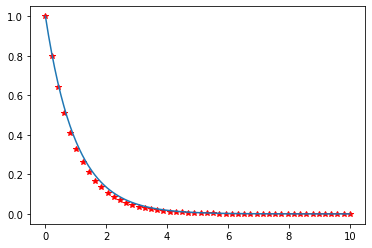

In [13]:
plt.plot(Vx, sol, "*r")
Vx1=np.linspace(0,10,100)
plt.plot(Vx1, solutionExacte(Vx1))

**Eurler implicite**

In [26]:
def EulerImpl(nbpas,f,duree,y0) :
    dt = duree/nbpas
    Y = np.zeros( nbpas+1 )
    Temps = np.linspace(0,duree,nbpas+1)
    Y[0] = y0 
    for n in range(nbpas) :
        def h(V): return Y[n] + dt*f(V,Temps[n+1]) - V
        Y[n+1] = root(h,Y[n]).x
    return Temps,Y

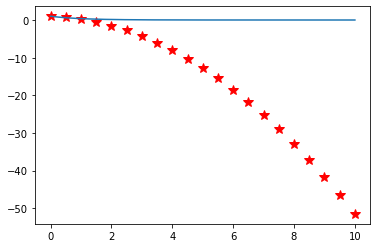

In [28]:
Temps2,Y2 = EulerImpl(Nbpoints,f,duree,1)
plt.plot(Temps2,Y2,"*r",marker='*',markersize=10.,label="Euler implicite")
Vx = np.linspace(0,duree,1000)
plt.plot(Vx,solutionExacte(Vx))

**Runge et Kutta**

In [29]:
def RK4(nbpas,f,duree,y0) :
    dt = duree/nbpas
    Y = np.zeros( nbpas+1 )
    Temps = np.linspace(0,duree,nbpas+1)
    Y[0] = y0 
    for n in range(nbpas) :
        Yn = Y[n]
        K1 = f(Yn,Temps[n])
        K2 = f(Yn+dt*K1/2,Temps[n]+dt/2)
        K3 = f(Yn+dt*K2/2,Temps[n]+dt/2)
        K4 = f(Yn+dt*K3,Temps[n+1])
        Y[n+1] = Yn + dt*( K1 + 2*K2 + 2*K3 + K4 )/6
    return Temps,Y